In [2]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [29]:
annotations_path = "dataset-balanced/annotations/"

In [3]:
datasplits = ['train', 'test', 'val']

# Calculate statistics

In [48]:
stats_targets = {"train": {}, "test": {}, "val": {}}

stats_questions = {"train": 
                   {"exactly": {"no": 0, "yes": 0}, "more": {"no": 0, "yes": 0}}, 
                   "test":
                   {"exactly": {"no": 0, "yes": 0}, "more": {"no": 0, "yes": 0}}, 
                   "val":
                   {"exactly": {"no": 0, "yes": 0}, "more": {"no": 0, "yes": 0}}
                  }

stats_task = {"train": {"1small2big": 0, "1big2small": 0}, 
              "test": {"1small2big": 0, "1big2small": 0}, 
              "val": {"1small2big": 0, "1big2small": 0}}

In [49]:
for split in datasplits:
    with open(annotations_path + "/" + split + ".json") as f:
        annotation = json.load(f)
        
    for sample in annotation["questions"]:
        
        tokens = sample["question"].split()
        
        if sample["question_index"] % 6 == 1:
            shape = tokens[5]
            color = tokens[4]
            
            if (shape, color) in stats_targets[split]:
                stats_targets[split][(shape, color)] += 1
            else:
                stats_targets[split][(shape, color)] = 1
                
        stats_task[split][sample["task"]] += 1
        
        stats_questions[split][tokens[2]][sample["answer"]] += 1
                
        

In [50]:
annotation["questions"][0:6]

[{'question_index': 0,
  'image_index': 0,
  'images': ['25.png', '889.png', '1446.png'],
  'question': 'There are exactly two green circles that are big circles',
  'answer': 'yes',
  'task': '1small2big',
  'image_filename': '0.png'},
 {'question_index': 1,
  'image_index': 0,
  'images': ['25.png', '889.png', '1446.png'],
  'question': 'There is exactly one green circle that is a big circle',
  'answer': 'no',
  'task': '1small2big',
  'image_filename': '0.png'},
 {'question_index': 2,
  'image_index': 0,
  'images': ['25.png', '889.png', '1446.png'],
  'question': 'There are more green circles that are big circles',
  'answer': 'yes',
  'task': '1small2big',
  'image_filename': '0.png'},
 {'question_index': 3,
  'image_index': 0,
  'images': ['25.png', '889.png', '1446.png'],
  'question': 'There are exactly two green circles that are small circles',
  'answer': 'no',
  'task': '1small2big',
  'image_filename': '0.png'},
 {'question_index': 4,
  'image_index': 0,
  'images': ['25.p

In [51]:
stats_questions

{'train': {'exactly': {'no': 32000, 'yes': 32000},
  'more': {'no': 16000, 'yes': 16000}},
 'test': {'exactly': {'no': 4000, 'yes': 4000},
  'more': {'no': 2000, 'yes': 2000}},
 'val': {'exactly': {'no': 4000, 'yes': 4000},
  'more': {'no': 2000, 'yes': 2000}}}

In [52]:
stats_task

{'train': {'1small2big': 48000, '1big2small': 48000},
 'test': {'1small2big': 6000, '1big2small': 6000},
 'val': {'1small2big': 6000, '1big2small': 6000}}

In [53]:
stats_targets

{'train': {('circle', 'green'): 800,
  ('triangle', 'white'): 800,
  ('rectangle', 'white'): 800,
  ('circle', 'red'): 800,
  ('square', 'yellow'): 800,
  ('circle', 'yellow'): 800,
  ('square', 'blue'): 800,
  ('triangle', 'red'): 800,
  ('circle', 'white'): 800,
  ('circle', 'blue'): 800,
  ('rectangle', 'green'): 800,
  ('square', 'white'): 800,
  ('rectangle', 'yellow'): 800,
  ('square', 'green'): 800,
  ('rectangle', 'red'): 800,
  ('triangle', 'yellow'): 800,
  ('square', 'red'): 800,
  ('triangle', 'blue'): 800,
  ('triangle', 'green'): 800,
  ('rectangle', 'blue'): 800},
 'test': {('circle', 'green'): 100,
  ('triangle', 'white'): 100,
  ('rectangle', 'white'): 100,
  ('circle', 'red'): 100,
  ('square', 'yellow'): 100,
  ('circle', 'yellow'): 100,
  ('square', 'blue'): 100,
  ('triangle', 'red'): 100,
  ('circle', 'white'): 100,
  ('circle', 'blue'): 100,
  ('rectangle', 'green'): 100,
  ('square', 'white'): 100,
  ('rectangle', 'yellow'): 100,
  ('square', 'green'): 100,
  (

# Visual check

In [56]:
import random
from PIL import Image
from ipywidgets import widgets, HBox
from random import randrange

split = "train"

with open(annotations_path + split + ".json") as f:
    dataset = json.load(f)


In [74]:
random_sample_id = randrange(len(dataset["questions"]) + 1)

image_filename = dataset["questions"][random_sample_id]["image_filename"]

img = Image.open(images_path + split + "/" + image_filename)

print(dataset["questions"][random_sample_id]["question"])
print(dataset["questions"][random_sample_id]["answer"])
print(dataset["questions"][random_sample_id]["task"])

There are more red squares that are big squares
yes
1small2big


In [75]:
images_path_orig = "malevic/data/pos1/images/" + split + "/"

img2 = [widgets.Image(value = open(images_path_orig + x, 'rb').read()) 
       for x in dataset["questions"][random_sample_id]["images"]]
    
hbox = HBox([img2[0], img2[1], img2[2]])
display(hbox)

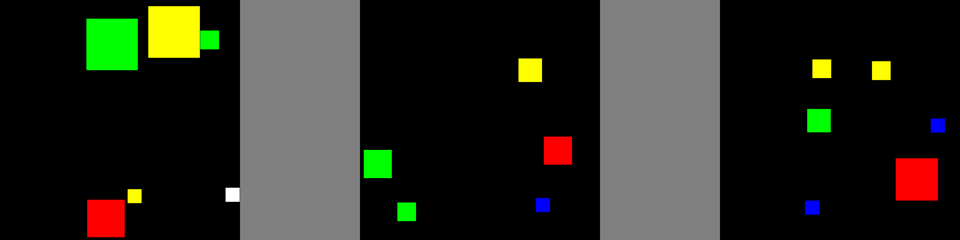

In [76]:
display(img)

In [77]:
dataset["questions"][random_sample_id]

{'question_index': 40052,
 'image_index': 6675,
 'images': ['9275.png', '1796.png', '1696.png'],
 'question': 'There are more red squares that are big squares',
 'answer': 'yes',
 'task': '1small2big',
 'image_filename': '6675.png'}

# Create big nlvr-like scenes

In [81]:
# https://stackoverflow.com/questions/55207987/is-there-any-way-to-merge-multiple-image-into-one-single-image-in-python

class Montage(object):
    def __init__(self,initial_image):
        self.montage = initial_image
        self.x,self.y = self.montage.shape[:2]

    def append(self,image):
        image = image[:,:,:3]
        x,y = image.shape[0:2]
        new_image = cv2.resize(image,(int(y*float(self.x)/x),self.x))
        self.montage = np.hstack((self.montage,new_image))

    def save(self, filename):
        cv2.imwrite(filename, self.montage) 

In [87]:
sep = cv2.imread("separator.png")

for split in datasplits:
    
    images_path = "malevic/data/pos1/images/" + split + "/"
    
    with open(annotations_path + "/" + split + ".json") as f:
        annotation = json.load(f)
        
    for sample in annotation["questions"]:

        sampled_imgs = sample["images"]

        if sample["question_index"] % 6 == 0:
            images = [cv2.imread(images_path + x)[:,:,:3] for x in sampled_imgs]
            
            img_id = sample["image_index"]

            if img_id % 3 == 0:
                m = Montage(images[0])
                m.append(sep)
                m.append(images[1])
                m.append(sep)
                m.append(images[2])
            elif img_id % 3 == 1:
                m = Montage(images[1])
                m.append(sep)
                m.append(images[0])
                m.append(sep)
                m.append(images[2])
            else:
                m = Montage(images[1])
                m.append(sep)
                m.append(images[2])
                m.append(sep)
                m.append(images[0])

            m.save("dataset-balanced/images_big_upd/" + split + "/" + sample['image_filename'])
            
            resized = Image.open("dataset-balanced/images_big_upd/" + split + "/" + sample['image_filename']).resize((960, 240))
            tmp = np.asarray(resized)
            plt.imsave("dataset-balanced/images_upd/" + split + "/" + sample['image_filename'], tmp)

In [97]:
from random import shuffle
import shutil

for split in ["train", "val", "test"]:
    
    malevic_folder = "malevic/data/pos1/images/" + split + "/"
    
    with open(annotations_path + "/" + split + "_nlvr2.json") as f:
        annotation = json.load(f)
    
    for datum in annotation["questions"]:
        datum["images_shuffled"] = datum["images"].copy()
        shuffle(datum["images_shuffled"])
        datum["nlvr2_ids"] = []
        
        for i, img_path in enumerate(datum["images_shuffled"]):
            new_img_path = str(datum['image_index']) + "-img" + str(i) + ".png"
            if datum['question_index'] % 6 == 0:
                shutil.copy(malevic_folder + img_path, "dataset-balanced/nlvr2/" + split + "/" + new_img_path)
            
    with open(annotations_path + "/" + split + "_nlvr2.json", "w") as f:
        json.dump(annotation, f)

In [11]:
for split in datasplits:
    
    with open(annotations_path + "/" + split + "_nlvr2.json") as f:
        annotation = json.load(f)
    with open(annotations_path + "/" + split + "_nlvr2.json") as f:
    annotation = json.load(f)
        
    new_data = []
    for i, datum in enumerate(annotation["questions"]):
        new_datum = {
            'identifier': datum['image_index'],
            'img0': datum["nlvr2_ids"][0].split('.')[0],
            'img1': datum["nlvr2_ids"][1].split('.')[0],
            'img2': datum["nlvr2_ids"][2].split('.')[0],
            'label': 1 if datum['answer'] == 'yes' else 0,
            'sent': datum['question'],
            'uid': 'nlvr2_%s_%d' % (split, i),
        }
        new_data.append(new_datum)
        
    with open('dataset-balanced/nlvr2/%s.json' % split, 'w') as g:
        json.dump(new_data, g, sort_keys=True, indent=4)

In [105]:
import os

for split in datasplits:

    directory = "dataset-balanced/nlvr2/" + split + "/"

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".png"): 
            resized = Image.open(directory + filename).resize((350, 350))
            tmp = np.asarray(resized)
            plt.imsave(directory + filename, tmp)

# Separate datasets by statement and tasks type

In [4]:
import json

for split in ['test', 'train', 'valid']:
    
    new_data_exactly = []
    new_data_more = []
    
    with open('dataset-balanced/nlvr2/%s.json' % split) as g:
        #json.dump(new_data, g, sort_keys=True, indent=4)
        data = json.load(g)
        
    for datum in data:
        if datum['sent'].split()[2] == 'more':
            new_data_more.append(datum)
        elif datum['sent'].split()[2] == 'exactly':
            new_data_exactly.append(datum)
                
    with open('dataset-balanced/nlvr2/%s_more.json' % split, "w") as g:
        json.dump(new_data_more, g, sort_keys=True, indent=4)
    with open('dataset-balanced/nlvr2/%s_exactly.json' % split, "w") as g:
        json.dump(new_data_exactly, g, sort_keys=True, indent=4)

In [7]:
import json

for split in ['test', 'train', 'valid']:
    
    new_data = []
    
    with open('dataset-balanced/nlvr2/%s.json' % split) as g:
        #json.dump(new_data, g, sort_keys=True, indent=4)
        data = json.load(g)
        
    for datum in data:
        new_datum = {}
        new_datum['identifier'] = datum['identifier']
        new_datum['img0'] = str(datum['identifier'])
        new_datum['sent'] = datum['sent']
        new_datum['label'] = datum['label']
        new_datum['uid'] = datum['uid']
        
        new_data.append(new_datum)
                
    with open('dataset-balanced/nlvr2/upd/%s.json' % split, "w") as g:
        json.dump(new_data, g, sort_keys=True, indent=4)

In [8]:
import json

for split in ['test', 'train', 'valid']:
    
    new_data_more = []
    new_data_exactly = []
    
    with open('dataset-balanced/nlvr2/upd/%s.json' % split) as g:
        #json.dump(new_data, g, sort_keys=True, indent=4)
        data = json.load(g)
        
    for datum in data:
        if datum['sent'].split()[2] == 'more':
            new_data_more.append(datum)
        elif datum['sent'].split()[2] == 'exactly':
            new_data_exactly.append(datum)
                
    with open('dataset-balanced/nlvr2/upd/%s_more.json' % split, "w") as g:
        json.dump(new_data_more, g, sort_keys=True, indent=4)
    with open('dataset-balanced/nlvr2/upd/%s_exactly.json' % split, "w") as g:
        json.dump(new_data_exactly, g, sort_keys=True, indent=4)

In [13]:
for split in datasplits:
    
    with open(annotations_path + "/" + split + "_nlvr2.json") as f:
        annotation = json.load(f)
        
    new_data_1small = []
    new_data_1big = []
    
    si = 0
    bi = 0
    
    for datum in annotation["questions"]:
        new_datum = {
            'identifier': datum['image_index'],
            'img': str(datum['image_index']),
            'img0': datum["nlvr2_ids"][0].split('.')[0],
            'img1': datum["nlvr2_ids"][1].split('.')[0],
            'img2': datum["nlvr2_ids"][2].split('.')[0],
            'label': 1 if datum['answer'] == 'yes' else 0,
            'sent': datum['question'],
        }
        if datum['task'] == '1small2big':
            new_datum['uid'] = 'nlvr2_%s_%d' % (split, si)
            new_data_1small.append(new_datum)
            si += 1
        elif datum['task'] == '1big2small':
            new_datum['uid'] = 'nlvr2_%s_%d' % (split, bi)
            new_data_1big.append(new_datum)
            bi += 1
        
#     with open('dataset-balanced/nlvr2/%s.json' % split, 'w') as g:
#         json.dump(new_data, g, sort_keys=True, indent=4)

    with open('dataset-balanced/nlvr2/1small2big/%s.json' % split, 'w') as g:
            json.dump(new_data_1small, g, sort_keys=True, indent=4)
    with open('dataset-balanced/nlvr2/1big2small/%s.json' % split, 'w') as g:
            json.dump(new_data_1big, g, sort_keys=True, indent=4)

In [18]:
for split in datasplits:
    
    with open(annotations_path + "/" + split + "_nlvr2.json") as f:
        annotation = json.load(f)
        
    new_data = []
    
    for i, datum in enumerate(annotation["questions"]):
        new_datum = {
            'identifier': datum['image_index'],
            'img': str(datum['image_index']),
            'img0': datum["nlvr2_ids"][0].split('.')[0],
            'img1': datum["nlvr2_ids"][1].split('.')[0],
            'img2': datum["nlvr2_ids"][2].split('.')[0],
            'label': 1 if datum['answer'] == 'yes' else 0,
            'sent': datum['question'],
            'uid': 'nlvr2_%s_%d' % (split, i)
        }
        new_data.append(new_datum)

    with open('dataset-balanced/nlvr2/final_all/%s.json' % split, 'w') as g:
            json.dump(new_data, g, sort_keys=True, indent=4)